In [23]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from fc_net import *
from sklearn.preprocessing import OneHotEncoder

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# load data set
np.random.seed(42)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2,
                                                  stratify=y_train, random_state=42)

In [25]:
### print shapes
print(f"x_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}\n")
print(f"x_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}\n")
print(f"x_val.shape = {X_val.shape}")
print(f"y_val.shape = {y_val.shape}\n")

### print claess
print("classes = ", list(np.unique(y_train)))

x_train.shape = (48000, 28, 28)
y_train.shape = (48000,)

x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)

x_val.shape = (12000, 28, 28)
y_val.shape = (12000,)

classes =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [26]:
def one_hot_y(y):
    ohe = OneHotEncoder(categories=[range(10)], sparse=False)
    return ohe.fit_transform(y.reshape(-1,1))

def assert_one_hot(y, y_ohe):
    for label, encoded_label in zip(y, y_ohe):
        assert label == np.flatnonzero(encoded_label)[0]
        
y_train_encoded, y_test_encoded, y_val_encoded,  = one_hot_y(y_train), one_hot_y(y_test), one_hot_y(y_val)
assert_one_hot(y_train, y_train_encoded)
assert_one_hot(y_test, y_test_encoded)
assert_one_hot(y_val, y_val_encoded)

# reshaping Xs
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)

print(f"x_train.shape = {X_train.shape}")
print(f"y_train_encoded.shape = {y_train_encoded.shape}\n")
print(f"x_test.shape = {X_test.shape}")
print(f"y_test_encoded.shape = {y_test_encoded.shape}\n")
print(f"x_val.shape = {X_val.shape}")
print(f"y_val_encoded.shape = {y_val_encoded.shape}\n")

x_train.shape = (48000, 784)
y_train_encoded.shape = (48000, 10)

x_test.shape = (10000, 784)
y_test_encoded.shape = (10000, 10)

x_val.shape = (12000, 784)
y_val_encoded.shape = (12000, 10)



In [27]:
## for testing
X, y = next(next_batch(X_train, y_test_encoded, 32))
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}\n")

X.shape = (32, 784)
y.shape = (32, 10)



In [28]:
params, costs = L_layer_model(X_train, y_train_encoded,
                              layers_dims=[20,7,5,10],
                              learning_rate=0.09,
                              num_iterations=500,
                              batch_size=32)

W1.shape = (784, 20)
W2.shape = (20, 7)
W3.shape = (7, 5)
W4.shape = (5, 10)
W5.shape = (10, 10)


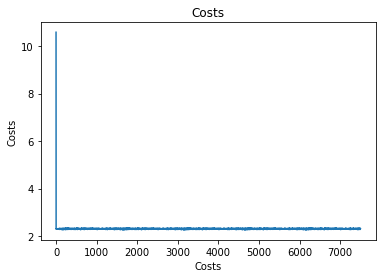

Last cost:  2.309202642271706


In [29]:
for param, mat in params.items():
    if param.startswith('W'):
        print(f"{param}.shape = {mat.shape}")
        
import matplotlib.pyplot as plt
plt.title("Costs")
plt.xlabel("Costs")
plt.ylabel("Costs")
plt.plot(costs)
plt.show()

print("Last cost: ", costs[-1])